In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Load the Data

In [3]:
data = pd.read_csv('dataset_1.csv')
data.head()

,Unnamed: 0,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity,Price_Present,Price_Future,Label
0,0,A,45846,USD,2010,Q3,2010-07-31,2010-10-06,2010-10-06,347000000.0,352000000.0,2.317000e+09,790000000.0,688000000.0,5.735000e+09,9.570000e+08,136000000.0,2.272000e+09,3.365000e+09,9100000000,459000000.0,1.501000e+09,2.917000e+09,2.177000e+09,3.373000e+09,6290000000,7.861000e+09,-7.986000e+09,3.152000e+09,2.810000e+09,9100000000,32.67,41.48,0
1,1,A,45846,USD,2010,Q4,2010-10-31,2010-12-20,2011-12-16,344000000.0,356000000.0,2.649000e+09,869000000.0,716000000.0,6.169000e+09,9.800000e+08,142000000.0,2.405000e+09,3.527000e+09,9696000000,499000000.0,1.501000e+09,3.083000e+09,2.190000e+09,3.377000e+09,6460000000,7.910000e+09,-8.038000e+09,3.444000e+09,3.236000e+09,9696000000,40.63,43.95,0
2,2,A,45846,USD,2011,Q1,2011-01-31,2011-03-09,2011-03-09,347000000.0,355000000.0,2.638000e+09,854000000.0,797000000.0,4.598000e+09,9.820000e+08,134000000.0,2.330000e+09,3.446000e+09,8044000000,444000000.0,1.000000e+06,1.406000e+09,2.138000e+09,3.299000e+09,4705000000,8.066000e+09,-8.308000e+09,3.637000e+09,3.339000e+09,8044000000,46.05,48.71,0
3,3,A,45846,USD,2011,Q2,2011-04-30,2011-06-07,2011-06-07,347000000.0,355000000.0,2.975000e+09,918000000.0,853000000.0,5.096000e+09,1.004000e+09,123000000.0,2.426000e+09,3.553000e+09,8649000000,486000000.0,0.000000e+00,1.592000e+09,2.144000e+09,3.096000e+09,4688000000,8.146000e+09,-8.308000e+09,3.837000e+09,3.961000e+09,8649000000,47.70,35.69,1
4,4,A,45846,USD,2011,Q3,2011-07-31,2011-09-07,2011-09-07,348000000.0,357000000.0,3.101000e+09,917000000.0,897000000.0,5.223000e+09,1.000000e+09,122000000.0,2.408000e+09,3.530000e+09,8753000000,470000000.0,0.000000e+00,1.505000e+09,2.168000e+09,3.048000e+09,4553000000,8.254000e+09,-8.500000e+09,4.167000e+09,4.200000e+09,8753000000,35.69,36.66,2


In [4]:
data.shape

(58828, 34)

##Segregating variables: Independent and Dependent Variables

In [5]:
#seperating independent and dependent variables
x = data.drop(['Unnamed: 0', 'Ticker', 'SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period', 'Report Date', 'Publish Date', 'Restated Date', 'Price_Future'], axis=1)
y = data['Price_Future']
x.shape, y.shape

((58828, 24), (58828,))

In [6]:
x.head()

,Shares (Basic),Shares (Diluted),"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity,Price_Present,Label
0,347000000.0,352000000.0,2.317000e+09,790000000.0,688000000.0,5.735000e+09,9.570000e+08,136000000.0,2.272000e+09,3.365000e+09,9100000000,459000000.0,1.501000e+09,2.917000e+09,2.177000e+09,3.373000e+09,6290000000,7.861000e+09,-7.986000e+09,3.152000e+09,2.810000e+09,9100000000,32.67,0
1,344000000.0,356000000.0,2.649000e+09,869000000.0,716000000.0,6.169000e+09,9.800000e+08,142000000.0,2.405000e+09,3.527000e+09,9696000000,499000000.0,1.501000e+09,3.083000e+09,2.190000e+09,3.377000e+09,6460000000,7.910000e+09,-8.038000e+09,3.444000e+09,3.236000e+09,9696000000,40.63,0
2,347000000.0,355000000.0,2.638000e+09,854000000.0,797000000.0,4.598000e+09,9.820000e+08,134000000.0,2.330000e+09,3.446000e+09,8044000000,444000000.0,1.000000e+06,1.406000e+09,2.138000e+09,3.299000e+09,4705000000,8.066000e+09,-8.308000e+09,3.637000e+09,3.339000e+09,8044000000,46.05,0
3,347000000.0,355000000.0,2.975000e+09,918000000.0,853000000.0,5.096000e+09,1.004000e+09,123000000.0,2.426000e+09,3.553000e+09,8649000000,486000000.0,0.000000e+00,1.592000e+09,2.144000e+09,3.096000e+09,4688000000,8.146000e+09,-8.308000e+09,3.837000e+09,3.961000e+09,8649000000,47.70,1
4,348000000.0,357000000.0,3.101000e+09,917000000.0,897000000.0,5.223000e+09,1.000000e+09,122000000.0,2.408000e+09,3.530000e+09,8753000000,470000000.0,0.000000e+00,1.505000e+09,2.168000e+09,3.048000e+09,4553000000,8.254000e+09,-8.500000e+09,4.167000e+09,4.200000e+09,8753000000,35.69,2


In [7]:
y.head()

0    41.48
1    43.95
2    48.71
3    35.69
4    36.66
Name: Price_Future, dtype: float64

##Scaling the data (Using MinMax Scaler)

In [8]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [9]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [10]:
x.head()

,Shares (Basic),Shares (Diluted),"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity,Price_Present,Label
0,0.013189,0.013262,0.016228,0.002050,0.009389,0.011391,0.018365,0.000530,0.006310,0.012129,0.011541,0.003059,0.008595,0.009165,0.006773,0.015508,0.012695,0.055579,0.965186,0.190487,0.066599,0.011541,3.266000e-07,0.0
1,0.013075,0.013413,0.018553,0.002255,0.009771,0.012253,0.018454,0.000553,0.006675,0.012404,0.012297,0.003326,0.008595,0.009686,0.006809,0.015518,0.012950,0.055888,0.964960,0.191052,0.067596,0.012297,4.062000e-07,0.0
2,0.013189,0.013376,0.018476,0.002216,0.010876,0.009133,0.018462,0.000522,0.006469,0.012266,0.010202,0.002959,0.000006,0.004417,0.006664,0.015309,0.010308,0.056873,0.963789,0.191426,0.067837,0.010202,4.604000e-07,0.0
3,0.013189,0.013376,0.020836,0.002382,0.011640,0.010122,0.018547,0.000479,0.006733,0.012448,0.010969,0.003239,0.000000,0.005002,0.006681,0.014763,0.010283,0.057378,0.963789,0.191812,0.069293,0.010969,4.769000e-07,0.5
4,0.013227,0.013451,0.021719,0.002380,0.012241,0.010374,0.018531,0.000475,0.006684,0.012409,0.011101,0.003132,0.000000,0.004728,0.006748,0.014634,0.010079,0.058060,0.962956,0.192451,0.069853,0.011101,3.568000e-07,1.0


## Importing the train test split function

In [12]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, test_size=1/3, random_state = 56)

## KNN Regression

In [15]:
#importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [22]:
# Creating instance of KNN
reg = KNN(n_neighbors = 11)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     12957498854.792038


## Elbow for Classifier

In [17]:
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)
    
    return test_mse

In [18]:
# Defining range of K
k = range(1,50)

In [19]:
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

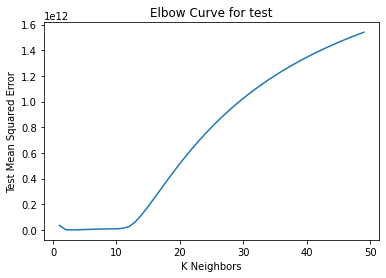

In [20]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

In [21]:
# Creating instance of KNN
reg = KNN(n_neighbors = 3)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     267279773.0723721


In [23]:
# Creating instance of KNN
reg = KNN(n_neighbors = 2)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print('Test MSE    ', k )

Test MSE     2274296617.1312137
